# Visualization attempts


Below you can find plots detailing the global data and trends. 
Followed by the info I have on countries that I thought were of interest, because of the global context or due to personal relations. 
The last set of graphs and table is data on the the countries that are in both the top 10 countries with the most new cases in the last 2 weeks as well as in the most new deaths during that same period, so the most active countries.

Apologies for the bad x-axes indexing for the last 1 sets of plots but this sheet will be updated and improved on a daily basis.

The data is collected in the Data-Processing sheet and placed, saved in the datasets I work with, it is provided by ourworldindata.org who receives the data from the ECDC.

I will update these sheets every day with the new daily information and all inputs and requests for extra information to see are welcome.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import my_tools as mt
import datetime

df_cases_new = mt.read_csv('cases_new', 'New cases')
df_cases_total = mt.read_csv('cases_total', 'Total cases')
df_deaths_total = mt.read_csv('deaths_total', 'Total deaths')

df_deaths_new = mt.read_csv('deaths_new', 'New deaths')
df_cases_relative = mt.read_csv('cases_relative', 'Cases over population')
df_deaths_relative = mt.read_csv('deaths_relative', 'Deaths over cases')

df_populations =  pd.read_csv('data/populations_2018.csv')

today= datetime.date.today()

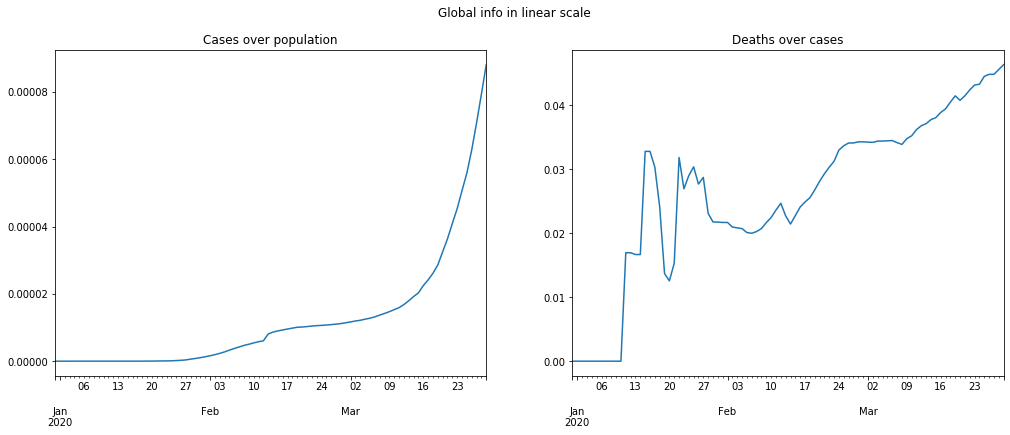

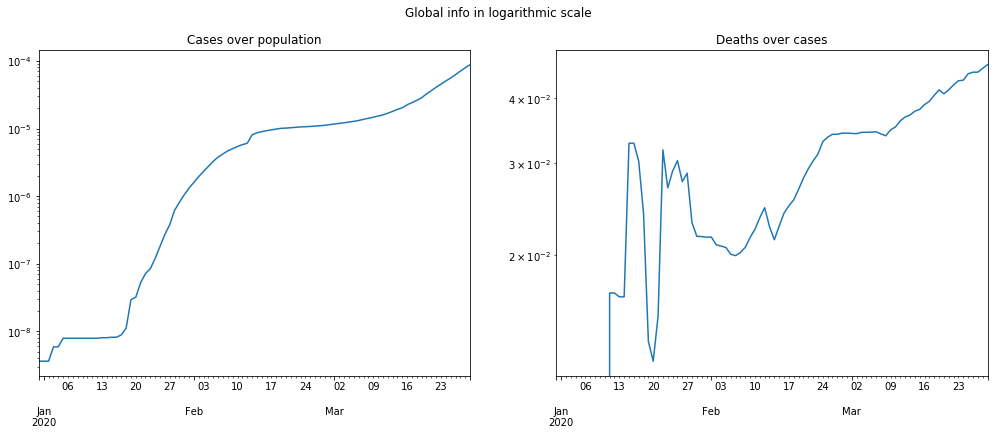

In [2]:
global_cases_relative = df_cases_total.sum(axis=1) / df_populations.sum(axis=0)[1]
global_cases_relative.name = 'Cases over population'
global_deaths_relative  = df_deaths_total.sum(axis=1) / df_cases_total.sum(axis=1)
global_deaths_relative.name = 'Deaths over cases'

mt.plot_side_by_side(global_cases_relative, global_deaths_relative, leg=False, title='Global info in linear scale')
mt.plot_side_by_side(global_cases_relative, global_deaths_relative, leg=False, scale='log', title='Global info in logarithmic scale')

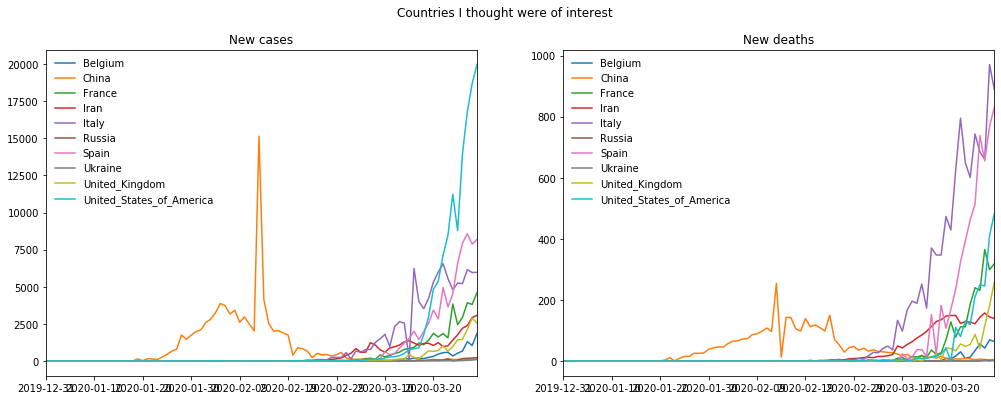

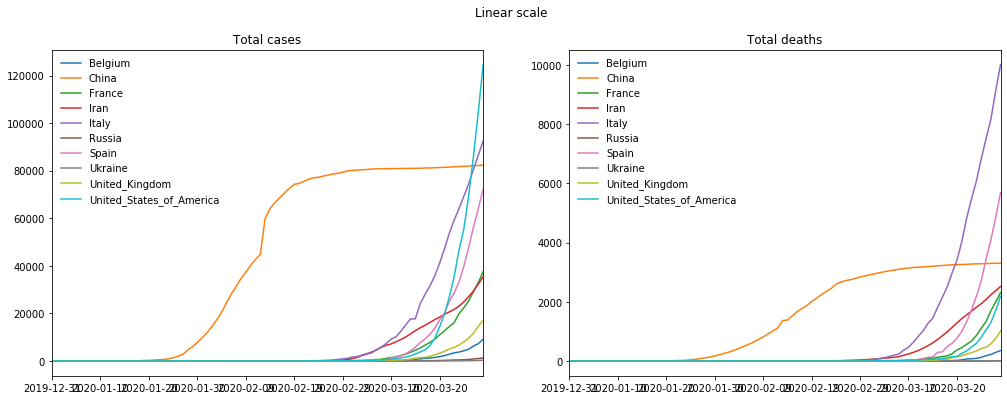

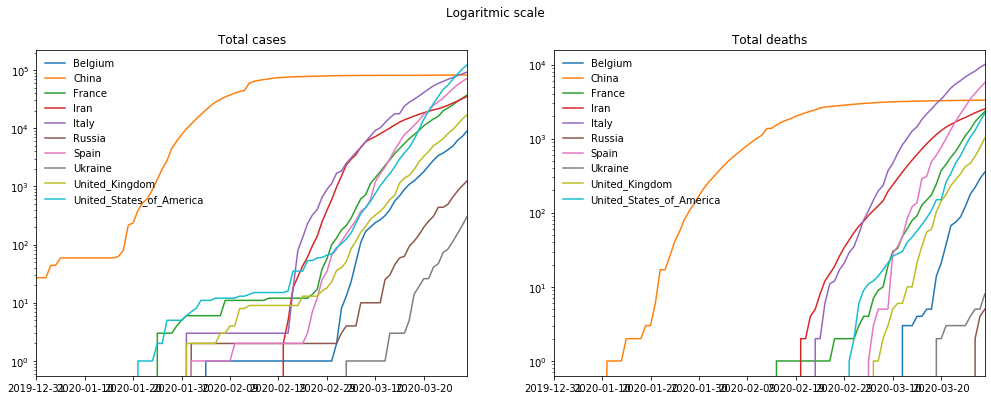

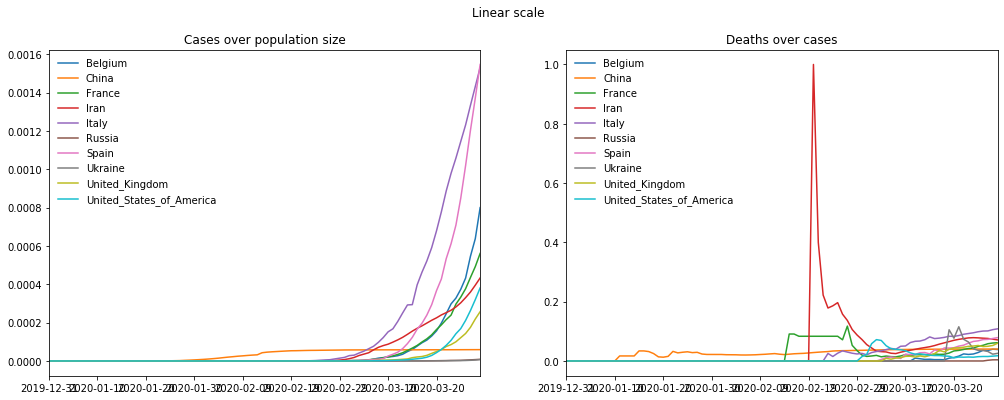

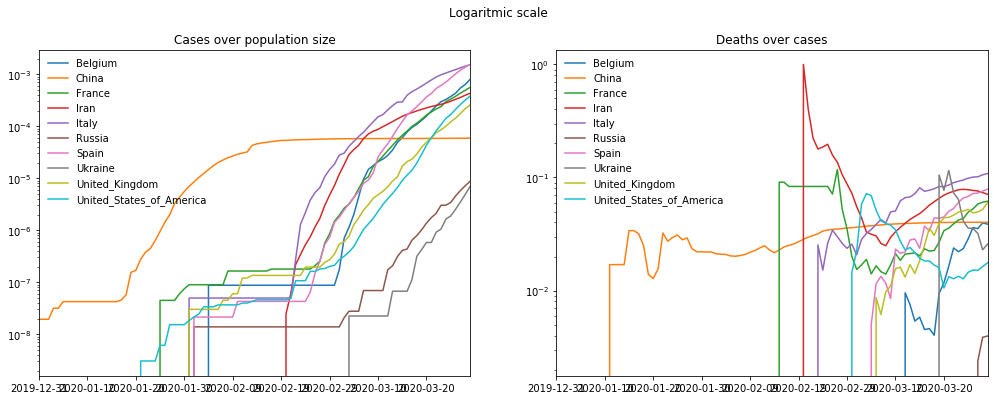

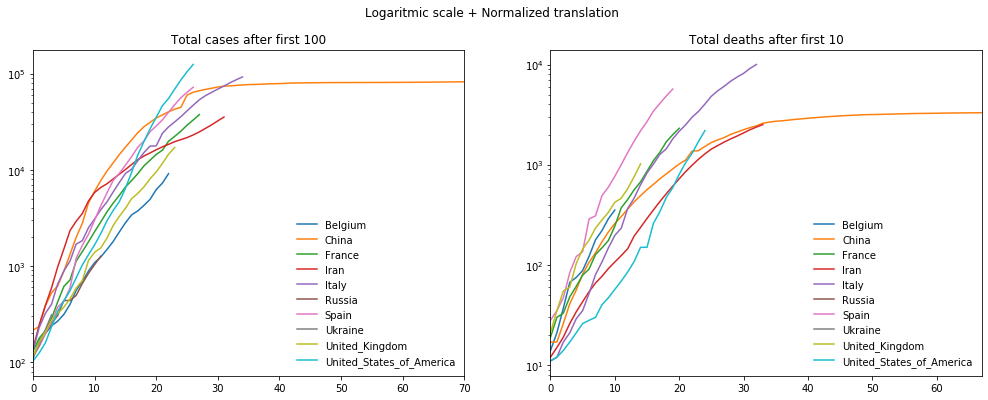

In [3]:
countries_of_interest = ['China', 'France', 'Italy', 'United_States_of_America', 'Spain', 'United_Kingdom', 'Belgium', 'Iran', 'Ukraine', 'Russia']
countries_of_interest.sort()

days = len(df_cases_new)

mt.show_everything(countries_of_interest, days, 'Countries I thought were of interest')
mt.show_table(countries_of_interest)

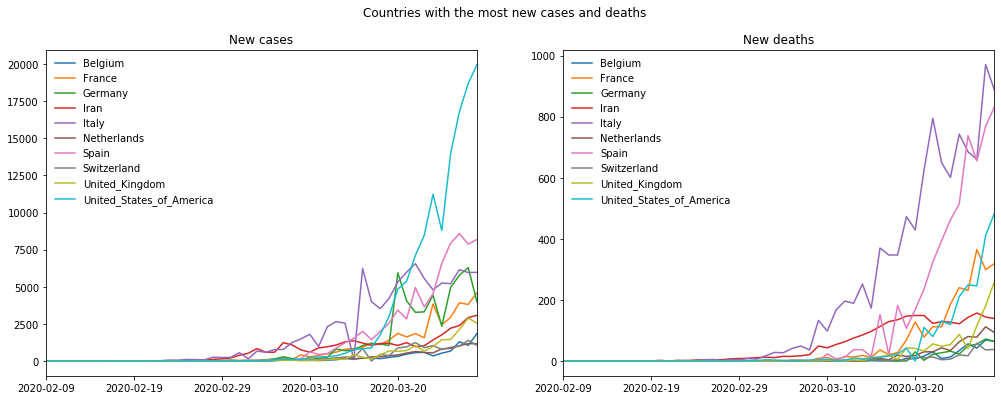

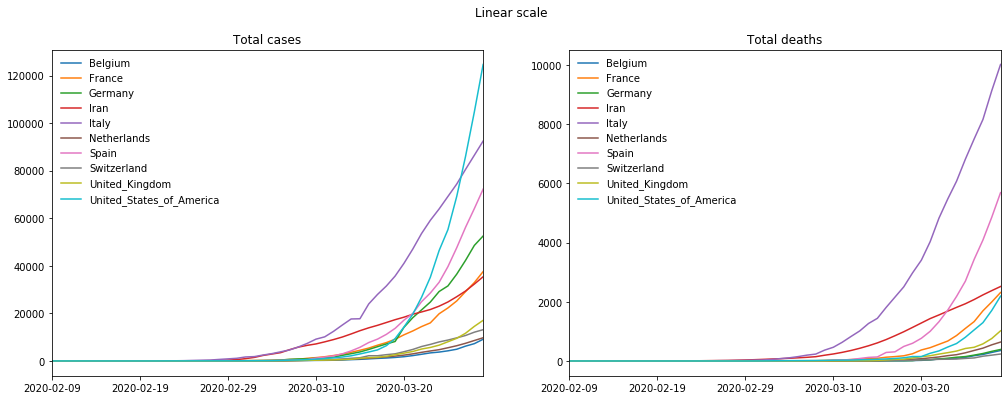

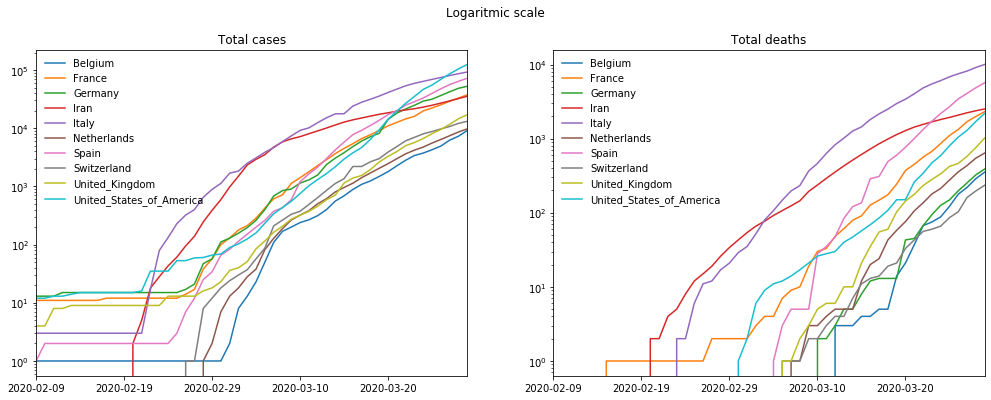

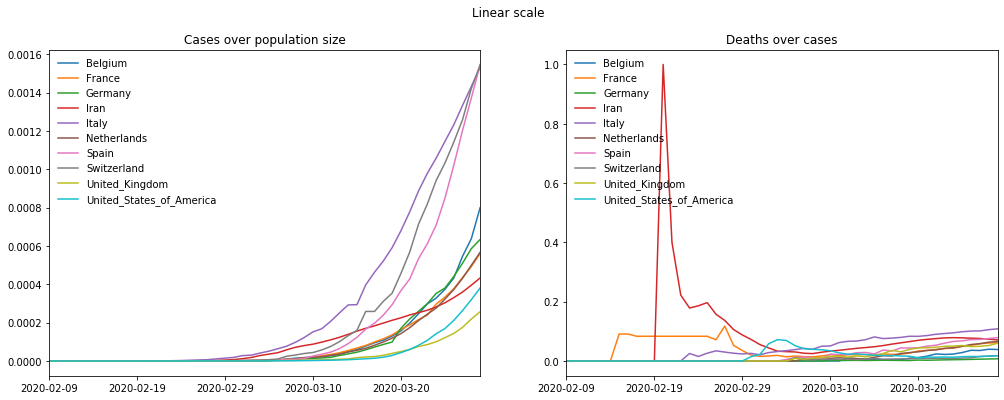

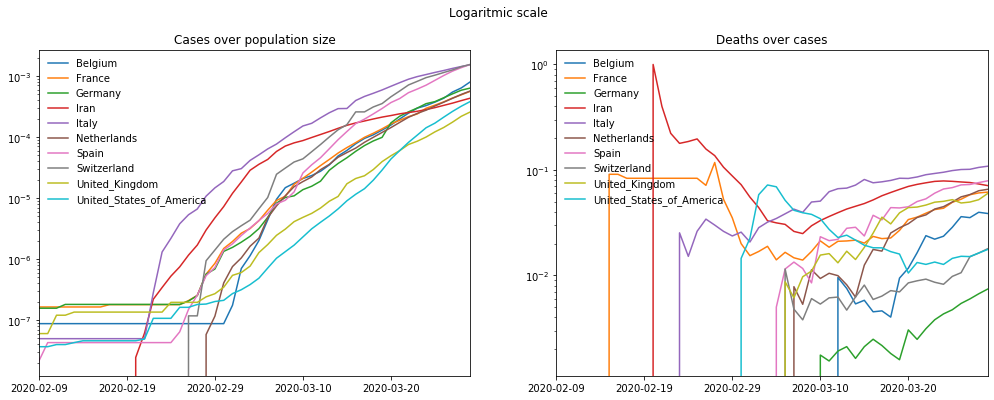

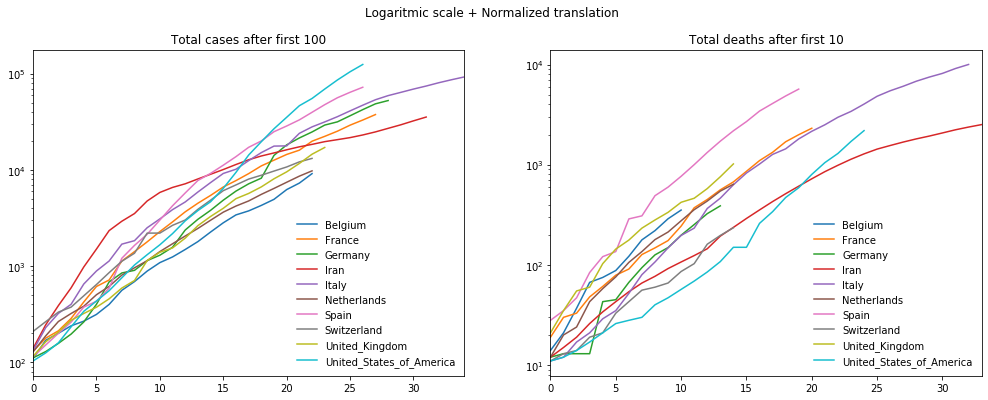

In [4]:
worst_cases_new = mt.worst_in_cat(today, 'cases_new')
worst_deaths_new = mt.worst_in_cat(today, 'deaths_new')

most_active_today = worst_cases_new.intersection(worst_deaths_new)
active_countries = most_active_today.tolist()
active_countries.sort()

days = 50

mt.show_everything(active_countries, days, 'Countries with the most new cases and deaths')
mt.show_table(active_countries)